### QUESTIONS

- Peut-on établir un lien entre la densité de médecins par spécialité et par territoire et la pratique du dépassement d'honoraires ? 
- Est-ce dans les territoires où la densité est la plus forte que les médecins pratiquent le moins les dépassements d'honoraires ? 
- Est-ce que la densité de certains médecins / praticiens est corrélée à la densité de population pour certaines classes d'âges (bébé/pédiatre, personnes âgées / infirmiers etc...) ?

C'est un sujet issu du Hackathon "données de santé" de Etalab (la page contient des liens vers différents jeux de données utiles, ainsi que d'autres exemples de questions que vous pouvez préférer aborder). Vous pouvez compléter ça avec des données de l'INSEE et des données sur la démographie des médecins.


### DATASET

- wiki hackathon : https://github.com/SGMAP-AGD/DAMIR/wiki/hackathon
        
- démographie médecin : http://www.data.drees.sante.gouv.fr/ReportFolders/reportFolders.aspx?IF_ActivePath=P,490,497,514



In [275]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [241]:
# Reading files
df_honoraires = pd.read_excel("./data/Honoraires.xls", sheet_name = "Spécialistes")
df_population = pd.read_excel("./data/estim-pop-dep-sexe-gca-1975-2019.xls", sheet_name ='2019', header =[3,4])

In [249]:
#remove the first 4 rows of the csv
df_population = pd.read_excel("./data/estim-pop-dep-sexe-gca-1975-2019.xls", sheet_name = 4, skiprows=[0, 1, 2, 3])

#drop NA values
df_population.dropna(inplace = True)

#rename columns 
columns = df_population.columns

ensemble_columns = list(map(lambda x : x, columns[2:8])) #[:-2] to remove .1 and .2 at the end of the column name.
men_columns = list(map(lambda x : x[:-2] + " (H)", columns[8:14]))
women_columns = list(map(lambda x : x[:-2] + " (F)", columns[14:]))

revised_columns = ['Département','Département_name'] + ensemble_columns + men_columns + women_columns

df_population.columns = revised_columns

#df_population["Num_dep"] = df_population["Num_Dep"].astype(str)

In [250]:
sheet_names = ["Spécialistes", "Généralistes et MEP", "Dentistes et ODF", "Sages-femmes", "Auxiliaires médicaux"]

In [267]:
def fees_data(sheet_name):
    
    df_fees = pd.read_excel("./data/Honoraires.xls", sheet_name=sheet_name, na_values="nc")
    
    #retrieve type of doctor 
    type_doctor = df_fees.columns[0]
    
    df_fees.columns = ["Spécialité", "Département", "Effectifs", "Honoraires sans dépassement", "Dépassements",
                       "Frais de déplacement", "Total des honoraires"]
    
    
    #remove rows contraining words TOTAL within column Department
    df_fees = df_fees[~df_fees["Département"].str.contains("TOTAL")]
    df_fees = df_fees[df_fees["Effectifs"] != 0]
   # df_fees = df_fees[~df_fees["Spécialité"].str.contains("TOTAL")]
    df_fees = df_fees.dropna()
    
    
    df_fees["Type"] = type_doctor
    
    df_fees["Département"] = df_fees["Département"].apply(lambda x : x.split("-")[0])
    df_fees["Département"] = df_fees["Département"].astype(str)
   
    return df_fees

In [268]:
medical_fees = pd.concat(map(fees_data, sheet_names))

In [269]:
medical_fees

,Spécialité,Département,Effectifs,Honoraires sans dépassement,Dépassements,Frais de déplacement,Total des honoraires,Type
0,02- Anesthésie-réanimation chirurgicale,01,17,4.530079e+06,2496180.45,0.00,7.026260e+06,Spécialistes
1,02- Anesthésie-réanimation chirurgicale,02,19,4.985260e+06,373837.57,0.00,5.359097e+06,Spécialistes
2,02- Anesthésie-réanimation chirurgicale,03,19,5.102902e+06,560978.59,0.00,5.663880e+06,Spécialistes
5,02- Anesthésie-réanimation chirurgicale,06,110,2.485377e+07,10816346.67,0.00,3.567012e+07,Spécialistes
6,02- Anesthésie-réanimation chirurgicale,07,23,5.271245e+06,802542.01,0.00,6.073787e+06,Spécialistes
...,...,...,...,...,...,...,...,...
617,TOTAL AUXILIAIRES MEDICAUX,971,1722,1.463080e+08,441690.16,22261718.26,1.690114e+08,Auxiliaires médicaux
618,TOTAL AUXILIAIRES MEDICAUX,972,1700,1.331281e+08,59198.07,28717068.84,1.619043e+08,Auxiliaires médicaux
619,TOTAL AUXILIAIRES MEDICAUX,973,358,3.000699e+07,8290.87,5561882.48,3.557716e+07,Auxiliaires médicaux
620,TOTAL AUXILIAIRES MEDICAUX,974,3386,2.817569e+08,70359.23,49656984.52,3.314843e+08,Auxiliaires médicaux


In [270]:
df_concat = pd.merge(df_population, medical_fees, how="left", on=["Département"])
df_concat = df_concat.dropna()

df_concat["Proportion dépassement"] = df_concat["Dépassements"]/df_concat["Total des honoraires"]




In [271]:
df_concat

,Département,Département_name,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans (H),20 à 39 ans (H),...,75 ans et plus (F),Total (F),Spécialité,Effectifs,Honoraires sans dépassement,Dépassements,Frais de déplacement,Total des honoraires,Type,Proportion dépassement
0,01,Ain,167230.0,148347.0,178058.0,94873.0,49917.0,638425.0,85905.0,74243.0,...,30115.0,323482.0,02- Anesthésie-réanimation chirurgicale,17.0,4.530079e+06,2496180.45,0.00,7.026260e+06,Spécialistes,0.355264
1,01,Ain,167230.0,148347.0,178058.0,94873.0,49917.0,638425.0,85905.0,74243.0,...,30115.0,323482.0,"TOTAL ANESTHESIE REANIMATION (02, 20)",17.0,4.530079e+06,2496180.45,0.00,7.026260e+06,Spécialistes,0.355264
2,01,Ain,167230.0,148347.0,178058.0,94873.0,49917.0,638425.0,85905.0,74243.0,...,30115.0,323482.0,03- Pathologie cardio-vasculaire,20.0,6.048363e+06,252877.05,0.00,6.301241e+06,Spécialistes,0.040131
3,01,Ain,167230.0,148347.0,178058.0,94873.0,49917.0,638425.0,85905.0,74243.0,...,30115.0,323482.0,"TOTAL CHIRURGIE (43, 44, 46, 47, 48, 49, 04)",13.0,2.335722e+06,1001804.27,0.00,3.337527e+06,Spécialistes,0.300164
4,01,Ain,167230.0,148347.0,178058.0,94873.0,49917.0,638425.0,85905.0,74243.0,...,30115.0,323482.0,05- Dermato-vénéréologie,14.0,1.620818e+06,339217.72,0.00,1.960035e+06,Spécialistes,0.173067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,95,Val-d'Oise,348945.0,328470.0,322384.0,150840.0,71284.0,1221923.0,177537.0,158943.0,...,44177.0,628760.0,26- Masseurs-kinésithérapeutes-rééducateurs,803.0,6.317249e+07,1157587.52,2135382.98,6.646546e+07,Auxiliaires médicaux,0.017416
3081,95,Val-d'Oise,348945.0,328470.0,322384.0,150840.0,71284.0,1221923.0,177537.0,158943.0,...,44177.0,628760.0,27- Pédicures,199.0,3.320712e+05,88118.22,3711.17,4.239006e+05,Auxiliaires médicaux,0.207875
3082,95,Val-d'Oise,348945.0,328470.0,322384.0,150840.0,71284.0,1221923.0,177537.0,158943.0,...,44177.0,628760.0,28- Orthophonistes,264.0,1.462136e+07,10441.88,49622.19,1.468142e+07,Auxiliaires médicaux,0.000711
3083,95,Val-d'Oise,348945.0,328470.0,322384.0,150840.0,71284.0,1221923.0,177537.0,158943.0,...,44177.0,628760.0,29- Orthoptistes,33.0,1.921645e+06,21639.93,102.50,1.943388e+06,Auxiliaires médicaux,0.011135


In [274]:
df_concat['Depassement ratio'] = df_concat['Dépassements'] / df_concat['Effectifs']
df_concat['Doctor density'] = df_concat['Effectifs'] / df_concat['Total']

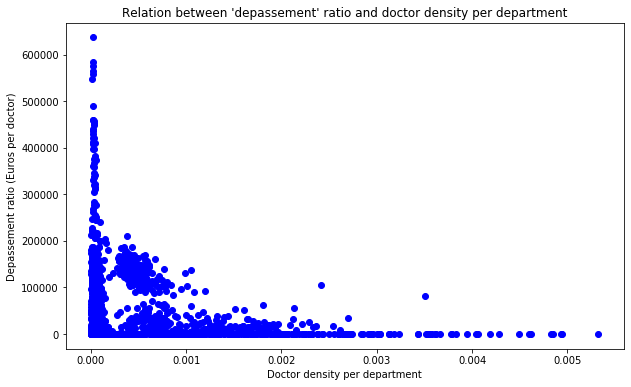

In [276]:
# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(df_concat['Doctor density'], df_concat['Depassement ratio'],
         linestyle='', marker='o', color='b')
plt.xlabel('Doctor density per department')
plt.ylabel('Depassement ratio (Euros per doctor)')
plt.title("Relation between 'depassement' ratio and doctor density per department")
plt.show()